In [1]:
# Import libraries for inspecting files
import json
import pickle
import h5py
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import patches
from PIL import Image

In [2]:
data_location = './data/'

## Symbol dictionaries (.pkl) + (.npy)

In [3]:
# Open QA vocabulary / dictionary file
with open(data_location+'gen_gqa_objects_qaVocab.pkl', 'rb') as f:
    dat_qa = pickle.load(f)

In [4]:
print('Questions and Answers: length =', len(dat_qa.allSeqs), '\n')
print(dat_qa.allSeqs[0:8])
print(dat_qa.allSeqs[8:14])
print(dat_qa.allSeqs[14:19])
print(dat_qa.allSeqs[19:26])

Questions and Answers: length = 10652802 

['do', 'you', 'see', 'any', 'trays', 'or', 'cds', 'no']
['where', 'was', 'the', 'photo', 'taken', 'lake']
['which', 'place', 'is', 'it', 'lake']
['on', 'which', 'side', 'is', 'the', 'bike', 'right']


In [5]:
# Open Question vocabulary / dictionary file
with open(data_location+'gen_gqa_objects_questionVocab.pkl', 'rb') as f:
    dat_qst = pickle.load(f)

In [6]:
print('Questions: length =', len(dat_qst.allSeqs),'\n')
print(dat_qst.allSeqs[0:7])
print(dat_qst.allSeqs[7:12])
print(dat_qst.allSeqs[12:16])
print(dat_qst.allSeqs[16:22])

Questions: length = 9565162 

['do', 'you', 'see', 'any', 'trays', 'or', 'cds']
['where', 'was', 'the', 'photo', 'taken']
['which', 'place', 'is', 'it']
['on', 'which', 'side', 'is', 'the', 'bike']


In [7]:
# Open answers vocabulary / dictionary file
with open(data_location+'gen_gqa_objects_answerVocab.pkl', 'rb') as f:
    dat_ans = pickle.load(f)

In [8]:
print('Answers: length =', len(dat_ans.allSeqs), '\n\n',dat_ans.allSeqs[0:4])

Answers: length = 1087640 

 ['no', 'lake', 'lake', 'right']


In [9]:
# Open question embeddings dictionary
dat_emb = np.load(data_location+'gen_gqa_objects_qEmbs.npy', mmap_mode='r')


In [10]:
print('Question embeddings dictionary: shape =', dat_emb.shape,'\n')
print(dat_emb[0:5])
print('...')
print(dat_emb[295:299])

Question embeddings dictionary: shape = (2957, 300) 

[[-1.26858085 -0.68130548 -0.97519705 ...  0.05408307 -0.54395505
   0.03633041]
 [-1.33486396  0.12564387 -2.11149365 ...  0.34890055 -0.38337371
  -0.1857953 ]
 [ 0.07728242 -1.08545734 -0.43364464 ... -0.07561782 -0.75830722
  -0.13077144]
 [-2.51483456 -0.35209872 -2.58503791 ... -0.22988331  1.26591721
   0.86252253]
 [-0.0054037   0.27079    -0.45665    ... -0.49672     0.22489
   0.19173   ]]
...
[[ 0.39968  -0.59553   0.22569  ... -0.16148  -0.24262   0.48961 ]
 [-0.53851   0.23302  -0.12842  ... -0.054958 -0.017548 -0.022145]
 [-0.29422   0.23123   0.066889 ... -0.1873    0.10478  -0.04166 ]
 [-0.10623   0.30212  -0.22156  ... -0.071355 -0.40002   0.61758 ]]


## Question-answer-image data / instances (.json)

In [11]:
with open(data_location+'balanced_train_data.json') as f:
    data_bal_train = json.load(f)

In [15]:
print("Keys: %s" % data_bal_train.keys())
bal_tr_key = list(data_bal_train.keys())[0]

Keys: dict_keys(['questions'])


In [16]:
print(len(data_bal_train['questions']))

943000


In [13]:
print('Balanced training data:\n')
print(len(data_bal_train))
for i in range(4):
    print(data_bal_train['questions'][i],'\n')

Balanced training data:

1
{'questionId': '0045', 'group': 'existOrC', 'answer': 'no', 'type': 'logical', 'fullAnswer': 'No, there are no CDs or trays.', 'question': 'Do you see any trays or CDs?', 'imageId': '2315895'} 

{'questionId': '001', 'group': 'place', 'answer': 'lake', 'type': 'query', 'fullAnswer': 'It was taken at the lake.', 'question': 'Where was the photo taken?', 'imageId': '2315895'} 

{'questionId': '002', 'group': 'place', 'answer': 'lake', 'type': 'query', 'fullAnswer': 'It is a lake.', 'question': 'Which place is it?', 'imageId': '2315895'} 

{'questionId': '00133', 'group': 'positionQuery', 'answer': 'right', 'type': 'query', 'fullAnswer': 'The bike is on the right of the image.', 'question': 'On which side is the bike?', 'imageId': '2315897'} 



In [47]:
with open(data_location+'balanced_val_data.json') as f:
    data_bal_val = json.load(f)

In [48]:
print('Balanced validation data:\n')
for i in range(4):
    print(data_bal_val['questions'][i],'\n')

Balanced validation data:

{'questionId': '006085', 'group': 'existOr', 'answer': 'yes', 'type': 'logical', 'fullAnswer': 'Yes, there is a bag.', 'question': 'Are there either any bags or chairs?', 'imageId': '2324265'} 

{'questionId': '006149', 'group': 'relChooser', 'answer': 'right', 'type': 'choose', 'fullAnswer': 'The bag is to the right of the man.', 'question': 'Is the bag to the right or to the left of the man?', 'imageId': '2324265'} 

{'questionId': '006060', 'group': 'relVerifyCo', 'answer': 'no', 'type': 'verify', 'fullAnswer': 'No, the man wears a jacket.', 'question': 'Does the man to the left of the bag wear a helmet?', 'imageId': '2324265'} 

{'questionId': '006055', 'group': 'relO', 'answer': 'jacket', 'type': 'query', 'fullAnswer': 'The man wears a jacket.', 'question': 'What does the man to the left of the kites wear?', 'imageId': '2324265'} 



In [49]:
with open(data_location+'gen_gqa_objects_valInstances.json') as f:
    data_val_ins = json.load(f)

In [50]:
print('Validation instances:\n')
for i in range(4):
    print(data_val_ins[i],'\n')

Validation instances:

{'questionStr': 'Is the giraffe that is not small standing next to the shrub that is not big?', 'question': ['is', 'the', 'giraffe', 'that', 'is', 'not', 'small', 'standing', 'next', 'to', 'the', 'shrub', 'that', 'is', 'not', 'big'], 'answer': 'yes', 'imageId': {'group': 'val', 'id': '2319456', 'idx': 93714}, 'tier': 'val', 'index': 90425, 'questionId': '13534717', 'objectsNum': 21, 'type': 'verify', 'group': 'relVerify'} 

{'questionStr': 'Is the shirt black or yellow?', 'question': ['is', 'the', 'shirt', 'black', 'or', 'yellow'], 'answer': 'black', 'imageId': {'group': 'val', 'id': '2342134', 'idx': 66867}, 'tier': 'val', 'index': 128227, 'questionId': '19225230', 'objectsNum': 37, 'type': 'choose', 'group': 'chooseAttr'} 

{'questionStr': 'Are there both a fork and a plate?', 'question': ['are', 'there', 'both', 'a', 'fork', 'and', 'a', 'plate'], 'answer': 'yes', 'imageId': {'group': 'val', 'id': '2367240', 'idx': 5064}, 'tier': 'val', 'index': 84935, 'questio

## Object bounding-box and features (.h5) + merged information (.json)

Object based visual features for the GQA dataset.
- objects/gqa_objects_*.h5: object-based features, using faster-RCNN, grouped into 16 chunks of up to 10,000 images each. Format: {"features": (10000 x 100 x 2048), "bboxes": (10000 x 100 x 4)}
- objects/gqa_objects_info.json: a dictionary from image ID to its properties. Format: {"<ID>": {"file": [0-15], "idx": int, "objectsNum": int, "width": int(px), "height": int(px)}}


In [51]:
# Open objects file and inspect
#file_objects = data_location+'objects/gqa_objects_0.h5'
file_objects = data_location+'gqa_objects.h5'
data_obs = h5py.File(file_objects, 'r')


In [52]:
# List all groups
print("Keys: %s" % data_obs.keys())
obs_key = list(data_obs.keys())[0]


Keys: <KeysViewHDF5 ['bboxes', 'features']>


In [53]:
# Get shape and visualise bounding boxes
print('Objects (bounding boxes): shape =', data_obs['bboxes'].shape, '\n\n', data_obs['bboxes'][7][0:40])

Objects (bounding boxes): shape = (148855, 100, 4) 

 [[  0.        48.475746 263.3643   379.2132  ]
 [ 42.011086 230.60493  332.445    499.5     ]
 [  0.        84.69976  224.23128  454.63696 ]
 [ 34.135395   0.       326.0112   367.7744  ]
 [  0.         0.       332.445    161.35997 ]
 [ 83.85817   37.022438 332.445    319.82718 ]
 [107.6931     0.       238.37592   53.41614 ]
 [  0.       278.01617  233.97484  499.5     ]
 [ 86.38778   68.40011  250.74667  499.5     ]
 [  0.         0.       139.2351   444.056   ]
 [ 95.58525    0.       257.59167  134.14844 ]
 [209.18625  326.98706  332.445    495.9078  ]
 [ 93.14254   53.13101  226.04173  189.5816  ]
 [208.65425  242.24011  332.445    411.5651  ]
 [232.10144    0.       332.445     96.753784]
 [ 80.25065  223.58543   97.55937  239.61864 ]
 [214.21715  284.51154  278.3408   362.64703 ]
 [  0.       133.85803  132.95088  322.19205 ]
 [  0.         0.         0.         0.      ]
 [  0.         0.         0.         0.      ]
 [  0.

In [54]:
# Get shape and visualise features
print('Objects (features): shape =', data_obs['features'].shape, '\n\n', data_obs['features'][7])

Objects (features): shape = (148855, 100, 2048) 

 [[0.08602902 0.09358256 0.2300392  ... 0.         2.2498505  0.        ]
 [0.2497527  0.20263314 0.9120516  ... 0.24374385 6.05459    0.        ]
 [0.14224684 0.09592698 0.79279613 ... 0.01048072 1.11162    0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [55]:
with open(data_location+'gqa_objects_merged_info.json') as f:
    data_obs_mi = json.load(f)

In [56]:
print(len(data_obs_mi))

148852


In [57]:
print(data_obs_mi['1'])

{'width': 800, 'objectsNum': 47, 'height': 600, 'index': 56464}


In [58]:
print('Objects Merged Info:\n')
for i in range(1,9):
    si = str(i)
    print(' ',si,':', data_obs_mi[si])

Objects Merged Info:

  1 : {'width': 800, 'objectsNum': 47, 'height': 600, 'index': 56464}
  2 : {'width': 800, 'objectsNum': 65, 'height': 600, 'index': 25754}
  3 : {'width': 640, 'objectsNum': 30, 'height': 480, 'index': 37794}
  4 : {'width': 640, 'objectsNum': 27, 'height': 480, 'index': 64442}
  5 : {'width': 800, 'objectsNum': 50, 'height': 600, 'index': 99862}
  6 : {'width': 800, 'objectsNum': 32, 'height': 600, 'index': 51038}
  7 : {'width': 800, 'objectsNum': 44, 'height': 600, 'index': 37208}
  8 : {'width': 800, 'objectsNum': 48, 'height': 600, 'index': 37982}


In [74]:
print(data_obs_mi['2342134'])

{'width': 500, 'objectsNum': 37, 'height': 375, 'index': 66867}


In [91]:
si_lookup = 0


si_ct = 0
si_find = None
si_max = 999999
for si in data_obs_mi:
    dat = data_obs_mi[si]['index']
    
    if dat==si_lookup:
        si_find = si
    
    si_ct += 1
    if si_ct > si_max:
        break

if si_find != None:
    print('Found for image:',si_find)
else:
    print('Not found')

print(data_obs_mi[si_find])


Found for image: 2353248
{'width': 422, 'objectsNum': 47, 'height': 500, 'index': 0}


## Visualise Object bounding-boxes on example

In [59]:
# Pick image from last validation instance and get corresponding reference in object list
print(data_obs_mi['2341361'])
print(data_obs_mi['1'])


{'width': 333, 'objectsNum': 21, 'height': 500, 'index': 96740}
{'width': 800, 'objectsNum': 47, 'height': 600, 'index': 56464}


In [60]:
# Determine the bounding box details
bboxes = data_obs['bboxes'][96740][0:21]
print(bboxes)

[[  0.       166.8717   332.445    442.2599  ]
 [  0.       358.55795  332.445    499.5     ]
 [  0.         0.       332.445    165.39952 ]
 [ 21.860954 299.42953   91.93634  493.90598 ]
 [ 83.848526 208.76828  209.124    276.94843 ]
 [ 39.90936  217.26599  226.65097  316.45786 ]
 [160.65764  322.58038  189.12372  498.80722 ]
 [277.97992  391.12823  332.445    499.5     ]
 [192.59987  234.09639  332.445    499.5     ]
 [ 58.982555  55.983067 283.9878   422.5266  ]
 [149.66513  209.88383  193.25604  250.35208 ]
 [  0.        10.868425  70.14408  225.21944 ]
 [204.13454   31.697887 332.445    427.98035 ]
 [ 93.265945 307.76654  114.46396  429.1016  ]
 [188.12729  382.4302   313.86896  428.18646 ]
 [149.3048   207.36313  168.79445  231.73598 ]
 [  0.       113.69054  125.78568  499.5     ]
 [ 86.818825  64.80941  239.08142  222.48819 ]
 [ 12.51338  344.33014  330.92017  445.2905  ]
 [167.6233    71.47435  314.02966  253.82294 ]
 [ 55.996956  47.19946  255.24168  188.673   ]]


In [61]:
def get_bb(bboxes, i):
    x = np.round(bboxes[i,0],0)
    y = np.round(bboxes[i,1],0)
    xy = (x,y)
    width = np.round(bboxes[i,2]-x,0)
    height = np.round(bboxes[i,3]-y,0)
    return xy, width, height

print(get_bb(bboxes,1))

((0.0, 359.0), 332.0, 140.0)


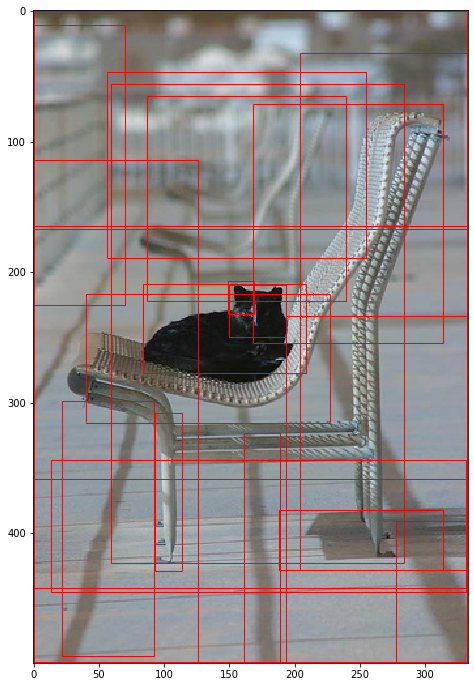

In [62]:
plt.figure(figsize=(20,12))
# Create figure and axes

img_ex = cv2.imread(data_location + 'images/2341361.jpg')
plt.imshow(img_ex)
for i in range(21):
    xy, width, height = get_bb(bboxes,i)
    rect = patches.Rectangle(xy, width, height,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)

plt.show()

## Image spatial features (.h5) + merged information (.json)

Spatial visual features for the GQA dataset.
- spatial/gqa_spatial_*.h5: spatial features, using Resnet-101, grouped into 16 chunks of up to 10,000 images each. Format: {"features": (10000 x 2048 x 7 x 7)}
- spatial/gqa_spatial_info.json: a dictionary from image ID to its properties (fileId and row index). Format: {"<ID>": {"file": [0-15], "idx": int}}

In [63]:
# Open spatial file and inspect
file_spatial = data_location+'/gqa_spatial.h5'
data_spat = h5py.File(file_spatial, 'r')


In [64]:
# List all groups
print("Keys: %s" % data_spat.keys())
spat_key = list(data_spat.keys())[0]


Keys: <KeysViewHDF5 ['features']>


In [65]:
# Get shape and visualise features
print('Spatial (features): shape =',data_spat['features'].shape, '\n\n', data_spat['features'][7][0])

Spatial (features): shape = (148855, 2048, 7, 7) 

 [[0.25336385 0.         0.         0.         0.         0.
  0.        ]
 [0.08742898 0.07958186 0.09106399 0.18255338 0.         0.04785626
  0.08983138]
 [0.32976782 0.96055865 1.4865386  0.96269864 0.72221935 0.6962018
  0.1975905 ]
 [0.50118977 1.0958952  2.5416887  2.4205055  1.412374   0.799222
  0.06978896]
 [0.7595927  0.99867857 2.9721532  1.9321383  1.1486123  1.4199538
  0.75956273]
 [0.         0.8807232  0.6926838  0.42064258 0.4402609  0.9651278
  0.9133452 ]
 [0.         0.         0.         0.         0.6172155  0.27684596
  0.29107052]]


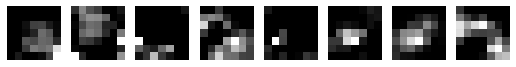

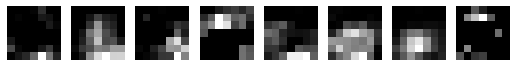

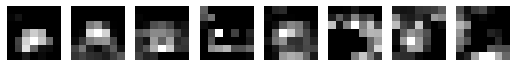

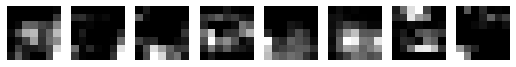

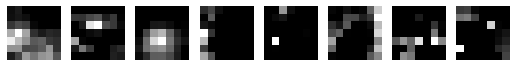

In [66]:
# Visualise ResNet output features for example (image 7)

for j in range(5):
    plt.figure(figsize=(9,2))
    for i in range(9):
        img = data_spat['features'][7][j*9+i]
        img_max = np.max(img)
        img_min = np.min(img)
        img = (img - img_min) / (img_max - img_min) * 256
        
        plt.subplot('18'+str(i))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()
        

In [67]:
with open(data_location+'gqa_spatial_merged_info.json') as f:
    data_spat_mi = json.load(f)

In [68]:
print('Spatial Merged Info:\n')
for i in range(1,9):
    si = str(i)
    print(' ',si,':', data_spat_mi[si])

Spatial Merged Info:

  1 : {'index': 0}
  2 : {'index': 1}
  3 : {'index': 2}
  4 : {'index': 3}
  5 : {'index': 4}
  6 : {'index': 5}
  7 : {'index': 6}
  8 : {'index': 7}


In [73]:
print(data_spat_mi['2342134'])
print(data_spat_mi['10001'])

{'index': 35609}


KeyError: '10001'

## Scene graphs (.json)

Scene graphs for the GQA dataset, for train and valiadation sets. 
Each image is associated with a scene graph the provides information about the objects, attributes and relations in the image.

In [33]:
with open('./sceneGraphs/val_sceneGraphs.json') as f:
    data_val_scenegraphs = json.load(f)

In [37]:
print(len(data_val_scenegraphs))

10696


In [34]:
print('Scene Graph Info (validation):\n')
print(' ',2353884,':', data_val_scenegraphs['2353884'], '\n\n')
print(' ',2410049,':', data_val_scenegraphs['2410049'])

Scene Graph Info (validation):

  2353884 : {'width': 500, 'objects': {'2716708': {'name': 'nose', 'h': 9, 'relations': [{'object': '2449847', 'name': 'of'}, {'object': '2493560', 'name': 'to the right of'}, {'object': '2370325', 'name': 'to the left of'}], 'w': 7, 'attributes': [], 'y': 54, 'x': 370}, '2370325': {'name': 'eyes', 'h': 4, 'relations': [{'object': '2493560', 'name': 'to the right of'}, {'object': '2716708', 'name': 'to the right of'}, {'object': '2449847', 'name': 'of'}], 'w': 6, 'attributes': [], 'y': 53, 'x': 379}, '2747168': {'name': 'sign', 'h': 52, 'relations': [{'object': '2449847', 'name': 'to the right of'}], 'w': 96, 'attributes': ['blue'], 'y': 124, 'x': 371}, '3576182': {'name': 'air', 'h': 194, 'relations': [], 'w': 492, 'attributes': [], 'y': 1, 'x': 2}, '3100523': {'name': 'ear', 'h': 12, 'relations': [{'object': '2449847', 'name': 'of'}, {'object': '2493560', 'name': 'to the right of'}], 'w': 11, 'attributes': [], 'y': 63, 'x': 389}, '2795769': {'name': 's